# Tarea 1. Optimización 
Guillermo Segura Gómez

## Ejercicio 1 (3.5 puntos)
1. Programar el método de la sección dorada descrito en la diapositiva 9 de la Clase 3. La función que implementa el método recibe como argumentos la función que se va a optimizar, los límites $x_l$ y $x_u$ del intervalo de búsqueda, la tolerancia $\tau>0$, y el número máximo de iteraciones $N$.
La función debe devolver el punto $x_k, f\left(x_k\right)$, los extremos del último intervalo de búsqueda $\left[x_l, x_u\right]$, el número de iteraciones $k$ realizadas y la variable booleana bres que indica si el algoritmo terminó porque se cumplió el criterio de paso o no.
2. Probar el método con las funciones que se describen en las siguientes celdas.
- Use el intervalo que se especifica en cada caso y $N=50$.
- Use como tolerancie $\tau=\epsilon_m^{1 / 3}$, donde $\epsilon_m$ es el épsilon de la máquina.
- Imprima $k, x_k, f_k, x_u-x_l$ y bres.

### 1. Programar el método de la sección dorada

In [19]:
# Cargamos las librerias necesarias para todo el notebook
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def golden_section(f, xMin, xMax, tol, nMax):
    rho = (np.sqrt(5) - 1) / 2 
    xk = None  # Inicializar xk

    for k in range(nMax):
        b = (1 - rho) * (xMax - xMin) 
        x1 = xMin + b
        x3 = xMax - b

        if f(x1) < f(x3):
            xMax = x3
            xk = x1
        elif f(x1) > f(x3): 
            xMin = x1
            xk = x3

        if (xMax - xMin) < tol:  
            return xk, xMin, xMax, k, True

    return xk, xMin, xMax, k, False 

### 2. Probar el método con las funciones

In [21]:
# Número máximo de iteraciones
N = 50
# Obtener el épsilon de la máquina para números de punto flotante de doble precisión
epsilon_m = np.finfo(float).eps

# Calcular la tolerancia como la raíz cúbica del épsilon de la máquina
tolerancia = epsilon_m ** (1/3)

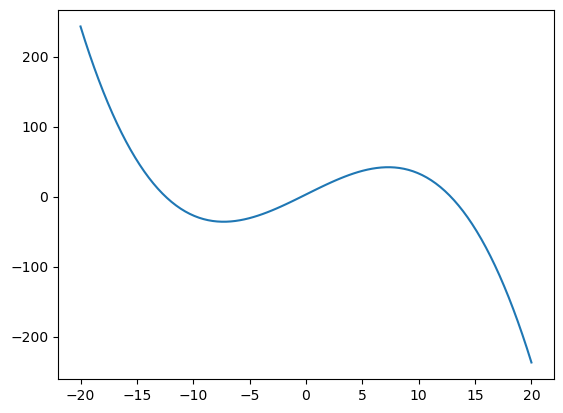

In [22]:
# Función objetivo 1
def fnc1(x):
    return -0.05*x**3 + 8*x + 3
xl = -20
xu = 20
xx = np.linspace(xl, xu, 100)
plt.plot(xx, fnc1(xx))

In [23]:
# Llamada a la función
xk, xMinFinal, xMaxFinal, k, found = golden_section(fnc1, xl, xu, tolerancia, N)

# Impresión de resultados
if found:
    print(f"El mínimo se encontró en x = {xk} después de {k+1} iteraciones.")
    print(f"Intervalo final: [{xMinFinal}, {xMaxFinal}]")
else:
    print("No se encontró el mínimo dentro de la tolerancia especificada.")

El mínimo se encontró en x = -7.302967212715323 después de 33 iteraciones.
Intervalo final: [-7.302970349467607, -7.302965274095799]


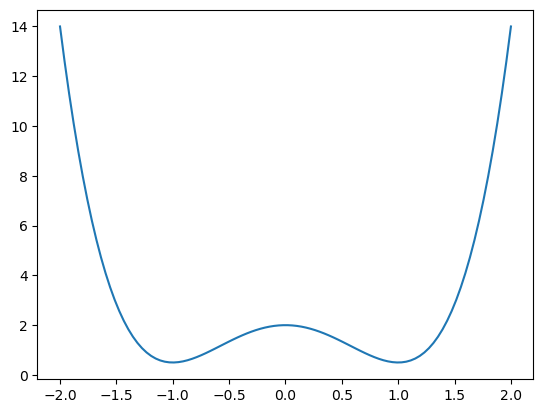

In [24]:
# Función objetivo 2
def fnc2(x):
    return 1.5*x**4 - 3*x**2 + 2
xl = -2
xu = 2  
xx = np.linspace(xl, xu, 100)
plt.plot(xx, fnc2(xx))

In [25]:
# Llamada a la función
xk, xMinFinal, xMaxFinal, k, found = golden_section(fnc2, xl, xu, tolerancia, N)

# Impresión de resultados
if found:
    print(f"El mínimo se encontró en x = {xk} después de {k+1} iteraciones.")
    print(f"Intervalo final: [{xMinFinal}, {xMaxFinal}]")
else:
    print(f"No se encontró el mínimo dentro de la tolerancia especificada. Último valor en x = {xk}")

No se encontró el mínimo dentro de la tolerancia especificada. Último valor en x = None


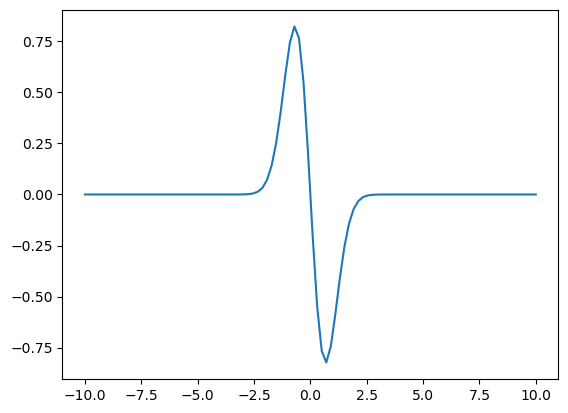

In [26]:
# Función objetivo 3
def fnc3(x):
    return -(x + np.sin(x))*np.exp(-x**2)
xl = -10
xu = 10
xx = np.linspace(xl, xu, 100)
plt.plot(xx, fnc3(xx))

In [27]:
# Llamada a la función
xk, xMinFinal, xMaxFinal, k, found = golden_section(fnc3, xl, xu, tolerancia, N)

# Impresión de resultados
if found:
    print(f"El mínimo se encontró en x = {xk} después de {k+1} iteraciones.")
    print(f"Intervalo final: [{xMinFinal}, {xMaxFinal}]")
else:
    print("No se encontró el mínimo dentro de la tolerancia especificada.")

El mínimo se encontró en x = 0.679578293854538 después de 32 iteraciones.
Intervalo final: [0.6795767254783962, 0.6795808315404426]


## Ejercicio 2 (3 puntos)

La función de Griewangk en $R^2$ se define como
$$
f(x)=f\left(x_1, x_2\right)=\frac{x_1^2+x_2^2}{4000}-\cos \left(x_1\right) \cos \left(\frac{x_2}{\sqrt{2}}\right)+1
$$

Dado el punto $x_k$ y la dirección $d_k$, definimos la función $g\left(t ; x_k, d_k\right)=f\left(x_k+t d_k\right)$.
1. Programe las funciones $f(x)$ y $g\left(t ; x_k, d_k\right)$.
2. Calcule de manera analítica el gradiente de $f(x)$ y programe la función correspondiente.
3. Sean $x_0=(3,0.5), d_0=p /\|p\|$, donde $p=(2,1)$, y $g_0=\nabla f\left(x_0\right) /\left\|\nabla f\left(x_0\right)\right\|$. Calcule el valor de la derivada direccional de $f$ en $x_0$ en la dirección $d_0$ y en la dirección $-g_0$. Imprima estos valores.
4. Genere una gráfica que muestre la gráfica de $g\left(t ; x_0, d_0\right)$ y $g\left(t ; x_0,-g_0\right)$ para $t \in[0,2]$.
5. Aplique el método de la sección dorada para minimizar la función $g\left(t ; x_0,-g_0\right)$ en el intervalo $[0,2]$. Si $t_0$ es el minimizador y $x_1=x_0-t_0 g_0$, imprima $x_0, f\left(x_0\right), t_0, x_1, f\left(x_1\right)$.
6. Repita los puntos 4 y 5 usando el intervalo $[0,8]$.

### 1. Programe las funciones

In [28]:
def f(x1, x2):
    return (x1**2 + x2**2)/4000 - np.cos(x1) * np.cos(x2 / np.sqrt(2)) + 1

def g(t, xk, dk):
    # Calcular el nuevo punto xk + t * dk
    x_new = xk + t * dk
    
    # Evaluar f en el nuevo punto
    return f(x_new[0], x_new[1])

In [29]:
# Ejemplo de uso
xk = np.array([1, 1])  # Punto inicial
dk = np.array([1, -1])  # Dirección de búsqueda

# Evaluar g para un valor específico
result = g(0.5, xk, dk)
print("g(0.5; xk, dk) =", result)

g(0.5; xk, dk) = 0.934263012030075


### 2. Calcule de manera analítica el gradiente

Para calcular el gradiente de la función de Griewangk 

$$ 
f(x) = f(x_1, x_2) = \frac{x_1^2 + x_2^2}{4000} - \cos(x_1) \cos\left(\frac{x_2}{\sqrt{2}}\right) + 1 
$$ 

con respecto a $x_1 $ y $x_2$, necesitamos tomar las derivadas parciales de $ f $ con respecto a cada una de estas variables.

#### Gradiente de $ f(x) $

El gradiente de $f(x)$, denotado como $ \nabla f(x) $, es un vector de derivadas parciales que se define como:

$$
\nabla f(x) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2} \right) 
$$

#### Derivada Parcial con respecto a $ x_1 $

$$
\frac{\partial f}{\partial x_1} = \frac{2x_1}{4000} - \left(-\sin(x_1)\right) \cos\left(\frac{x_2}{\sqrt{2}}\right) 
$$

Simplificando:

$$
\frac{\partial f}{\partial x_1} = \frac{x_1}{2000} + \sin(x_1) \cos\left(\frac{x_2}{\sqrt{2}}\right) 
$$

#### Derivada Parcial con respecto a $ x_2 $

$$
\frac{\partial f}{\partial x_2} = \frac{2x_2}{4000} - \cos(x_1) \left(-\sin\left(\frac{x_2}{\sqrt{2}}\right)\right) \left(\frac{1}{\sqrt{2}}\right) 
$$

Simplificando:

$$
\frac{\partial f}{\partial x_2} = \frac{x_2}{2000} + \frac{1}{\sqrt{2}} \sin\left(\frac{x_2}{\sqrt{2}}\right) \cos(x_1)
$$

#### Función del Gradiente

Así, la función del gradiente de  $f(x)$ es:

$$
\nabla f(x) = \left( \frac{x_1}{2000} + \sin(x_1) \cos\left(\frac{x_2}{\sqrt{2}}\right), \frac{x_2}{2000} + \frac{1}{\sqrt{2}} \sin\left(\frac{x_2}{\sqrt{2}}\right) \cos(x_1) \right) 
$$


In [30]:
# Función del gradiente de f(x)
def grad_f(x):
    x1, x2 = x
    # Derivada parcial con respecto a x1
    df_dx1 = x1/2000 + np.sin(x1) * np.cos(x2/np.sqrt(2))
    # Derivada parcial con respecto a x2
    df_dx2 = x2/2000 + (1/np.sqrt(2)) * np.sin(x2/np.sqrt(2)) * np.cos(x1)
    
    return np.array([df_dx1, df_dx2])

# Ejemplo de uso
x = np.array([1, 1])  # Punto de evaluación
gradiente = grad_f(x)
print("Gradiente de f en x =", x, "es", gradiente)

Gradiente de f en x = [1 1] es [0.64022377 0.24869472]


### 3. Calcule el valor de la derivada direccional

In [31]:
# Punto no 3
x0 = np.array([3, 0.5]) # Punto inicial
d0 = np.array([2/np.sqrt(5), 1/np.sqrt(5)]) 

# Calculo de g0
g0 = grad_f(x0)/np.sqrt((grad_f(x0)[0]**2 + grad_f(x0)[1]**2))

# Calcular la derivada direccional en la dirección d0
derivada_d0 = np.dot(grad_f(x0), d0)

# Calcular la derivada direccional en la dirección -g0
derivada_neg_g0 = np.dot(grad_f(x0), -g0)

print("Derivada direccional en dirección d0:", derivada_d0)
print("Derivada direccional en dirección -g0:", derivada_neg_g0)

Derivada direccional en dirección d0: 0.01147503459612003
Derivada direccional en dirección -g0: -0.276678489444202


Para graficar $ g(t; x_0, d_0) $ y $ g(t; x_0, -g_0) $ para $ t \in [0,2] $ definimos una función $ g_t(t, x0, direction) $ que toma $ t $, $ x_0 $ y una dirección (que puede ser $ d_0 $ o $ -g_0 $), y luego utilizamos esta función para calcular los valores de $ g $ para un rango de valores de $ t $.

### 4. Genere una gráfica que muestre la gráfica

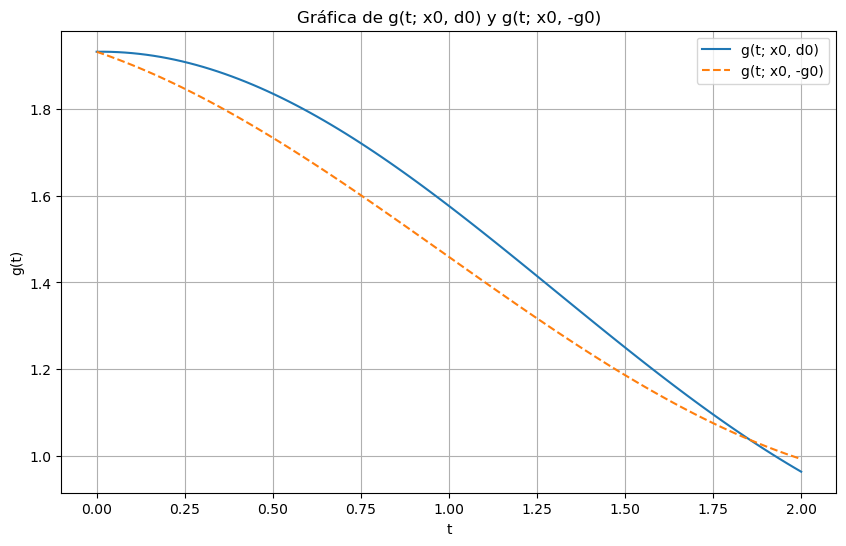

In [32]:
# Rango de valores t
t_values = np.linspace(0, 2, 100)

# Calcular los valores de g para cada dirección
g_d0_values = [g(t, x0, d0) for t in t_values]
g_neg_g0_values = [g(t, x0, -g0) for t in t_values]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(t_values, g_d0_values, label='g(t; x0, d0)')
plt.plot(t_values, g_neg_g0_values, label='g(t; x0, -g0)', linestyle='--')
plt.title('Gráfica de g(t; x0, d0) y g(t; x0, -g0)')
plt.xlabel('t')
plt.ylabel('g(t)')
plt.legend()
plt.grid(True)
plt.show()

### 5. Aplique el método de la sección dorada para minimizar la función

In [33]:
def g_single_var(t):
    return g(t, x0, -g0)

# Aplicar el método de la sección dorada
t0, xMinFinal, xMaxFinal, k, found  = golden_section(g_single_var, 0, 2, tolerancia, N)

# Verificar si se encontró el mínimo y calcular x1
if found:
    x1 = x0 - t0 * g0
    print("Se encontró el mínimo:")
    print("x0:", x0)
    print("f(x0):", f(x0[0], x0[1]))
    print("t0:", t0)
    print("x1:", x1)
    print("f(x1):", f(x1[0], x1[1]))
else:
    print("No se encontró el mínimo en el número máximo de iteraciones.")


Se encontró el mínimo:
x0: [3.  0.5]
f(x0): 1.9310723123875322
t0: 1.9999971856632055
x1: [2.03215236 2.25021704]
f(x1): 0.9932410001528889


### 6. Repita los puntos 4 y 5 usando el intervalo $[0,8]$.

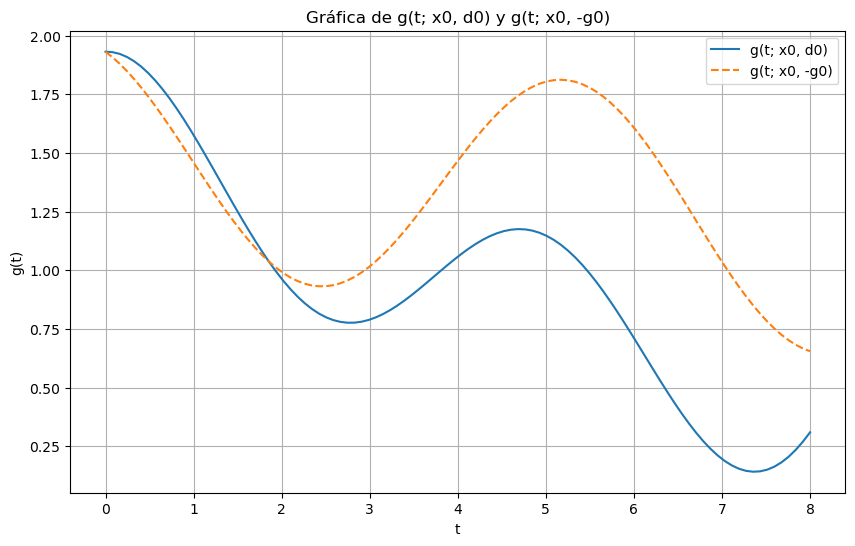

In [34]:
# Rango de valores t
t_values = np.linspace(0, 8, 100)

# Calcular los valores de g para cada dirección
g_d0_values = [g(t, x0, d0) for t in t_values]
g_neg_g0_values = [g(t, x0, -g0) for t in t_values]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(t_values, g_d0_values, label='g(t; x0, d0)')
plt.plot(t_values, g_neg_g0_values, label='g(t; x0, -g0)', linestyle='--')
plt.title('Gráfica de g(t; x0, d0) y g(t; x0, -g0)')
plt.xlabel('t')
plt.ylabel('g(t)')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# Aplicar el método de la sección dorada
t0, xMinFinal, xMaxFinal, k, found  = golden_section(g_single_var, 0, 8, tolerancia, N)

# Verificar si se encontró el mínimo y calcular x1
if found:
    x1 = x0 - t0 * g0
    print("Se encontró el mínimo:")
    print("x0:", x0)
    print("f(x0):", f(x0[0], x0[1]))
    print("t0:", t0)
    print("x1:", x1)
    print("f(x1):", f(x1[0], x1[1]))
else:
    print("No se encontró el mínimo en el número máximo de iteraciones.")


Se encontró el mínimo:
x0: [3.  0.5]
f(x0): 1.9310723123875322
t0: 2.4561060376666815
x1: [1.81143011 2.64936234]
f(x1): 0.9315587863963393


## Ejercicio 3 (1.5 puntos)

Sean $a, b \in R^n$. Calcule el gradiente y la Hessiana de la función $f(x)=\left(a^{\top} x\right)\left(b^{\top} x\right)$.

### Respuesta

Para calcular el gradiente y la Hessiana de la función $ f(x) = (a^\top x)(b^\top x) $, donde $ a, b \in R^n $ y $ x \in R^n $, hacemos lo siguiente.

### Gradiente de $f(x)$

El gradiente de $f(x)$ con respecto a $ x $ es un vector de derivadas parciales. Primero, expandimos $ f(x) $:

$$ 
f(x) = (a^\top x)(b^\top x) = \sum_{i=1}^n a_i x_i \sum_{j=1}^n b_j x_j 
$$

Para encontrar el gradiente, calculamos la derivada parcial de $ f(x) $ con respecto a cada componente de $ x $:

$$ 
\frac{\partial f}{\partial x_k} = \frac{\partial}{\partial x_k} \left( \sum_{i=1}^n a_i x_i \sum_{j=1}^n b_j x_j \right) $$

Observamos que la derivada de un término $ a_i x_i $ con respecto a $ x_k $ es $ a_i $ si $ i = k $ y $ 0 $ si $ i \neq k $. Aplicando la regla del producto, obtenemos:

$$ \frac{\partial f}{\partial x_k} = a_k \sum_{j=1}^n b_j x_j + b_k \sum_{i=1}^n a_i x_i $$

Por lo tanto, el gradiente de $f(x)$, que denotamos como $ \nabla f(x) $, es:

$$ \nabla f(x) = a (b^\top x) + b (a^\top x) $$

### Hessiana de $ f(x) $

La Hessiana es una matriz de segundas derivadas parciales. Para calcularla, tomamos las segundas derivadas de $ f(x) $ con respecto a los componentes de $ x $:

$$ \frac{\partial^2 f}{\partial x_k \partial x_l} = \frac{\partial}{\partial x_l} \left( \frac{\partial f}{\partial x_k} \right) $$

Dado que el gradiente es $ \nabla f(x) = a (b^\top x) + b (a^\top x) $, al tomar la derivada de este con respecto a $ x_l $, obtenemos:

$$ \frac{\partial^2 f}{\partial x_k \partial x_l} = \frac{\partial}{\partial x_l} (a_k b_l x_l + b_k a_l x_l) = a_k b_l + b_k a_l $$

Así, la Hessiana, $ H $, tiene componentes:

$$ H_{kl} = a_k b_l + b_k a_l $$

Y en forma matricial, la Hessiana se puede expresar como:

$$ H = a b^\top + b a^\top $$

### Resultados

El gradiente de $ f(x) $ es:

$$ \nabla f(x) = a (b^\top x) + b (a^\top x) $$

Y la Hessiana de $ f(x) $ es:

$$ H = a b^\top + b a^\top $$

## Ejercicio 4 (2 puntos)

Tenemos los valores de la derivada direccional $\frac{\partial f}{\partial p_i}$ de $f$ en el punto $x_0$ para tres direcciones $p_i$ :
$$
\begin{array}{lll}
\frac{\partial f}{\partial p_1}\left(x_0\right)=\frac{3}{\sqrt{2}} & \text { para } & p_1=\left(0, \frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}}\right)^{\top} \\
\frac{\partial f}{\partial p_2}\left(x_0\right)=\frac{1}{\sqrt{2}} & \text { para } & p_2=\left(\frac{1}{\sqrt{2}}, 0, \frac{1}{\sqrt{2}}\right)^{\top}
\end{array}
$$
$$
\frac{\partial f}{\partial p_3}\left(x_0\right)=-\frac{1}{\sqrt{2}} \quad \text { para } \quad p_3=\left(\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}}, 0\right)^{\top} .
$$

A partir de esto, calcule el vector gradiente $\nabla f\left(x_0\right)$.

### Respuesta
Para calcular el vector gradiente $\nabla f(x_0)$ a partir de las derivadas direccionales dadas, podemos usar la relación entre la derivada direccional de $f$ en un punto $x_0$ en la dirección de un vector $p$ y el gradiente de $f$. Esta relación se da por la fórmula:

$$
\frac{\partial f}{\partial p}(x_0) = \nabla f(x_0) \cdot p
$$

Donde $ \cdot $ denota el producto escalar. Dado que se nos proporcionan las derivadas direccionales para tres direcciones $p_1$, $p_2$, y $p_3$, podemos establecer un sistema de ecuaciones para resolver el gradiente $\nabla f(x_0)$.

Dado que $\nabla f(x_0) = (g_1, g_2, g_3)^\top$, podemos escribir las ecuaciones basadas en las derivadas direccionales dadas:

1. Para $p_1 = \left(0, \frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}}\right)^\top$ y $\frac{\partial f}{\partial p_1}(x_0) = \frac{3}{\sqrt{2}}$:

$$
\frac{3}{\sqrt{2}} = g_2 \cdot \frac{1}{\sqrt{2}} + g_3 \cdot \frac{1}{\sqrt{2}}
$$

2. Para $p_2 = \left(\frac{1}{\sqrt{2}}, 0, \frac{1}{\sqrt{2}}\right)^\top$ y $\frac{\partial f}{\partial p_2}(x_0) = \frac{1}{\sqrt{2}}$:

$$
\frac{1}{\sqrt{2}} = g_1 \cdot \frac{1}{\sqrt{2}} + g_3 \cdot \frac{1}{\sqrt{2}}
$$

3. Para $p_3 = \left(\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}}, 0\right)^\top$ y $\frac{\partial f}{\partial p_3}(x_0) = -\frac{1}{\sqrt{2}}$:

$$
-\frac{1}{\sqrt{2}} = g_1 \cdot \frac{1}{\sqrt{2}} + g_2 \cdot \frac{1}{\sqrt{2}}
$$

Podemos simplificar estas ecuaciones a:

1. $ g_2 + g_3 = 3 $
2. $ g_1 + g_3 = 1 $
3. $ g_1 + g_2 = -1 $

Resolviendo este sistema de ecuaciones, obtenemos los valores de $g_1$, $g_2$, y $g_3$, que son las componentes del gradiente $\nabla f(x_0)$.

Sumando las ecuaciones (2) y (3), obtenemos:

$$ 2g_1 + g_2 + g_3 = 0 $$

Usando $ g_2 + g_3 = 3 $ de la ecuación (1), tenemos:

$$ 2g_1 + 3 = 0 $$

Resolviendo para $ g_1 $:

$$ g_1 = -\frac{3}{2} $$

Usando $ g_1 $ en la ecuación (3):

$$ -\frac{3}{2} + g_2 = -1 $$

Resolviendo para $ g_2 $:

$$ g_2 = \frac{1}{2} $$

Finalmente, usando $ g_2 $ en la ecuación (1):

$$ \frac{1}{2} + g_3 = 3 $$

Resolviendo para $ g_3 $:

$$ g_3 = \frac{5}{2} $$

Por lo tanto, el vector gradiente $ \nabla f(x_0) $ es:

$$
\nabla f(x_0) = \left(-\frac{3}{2}, \frac{1}{2}, \frac{5}{2}\right)^\top
$$